In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pip install modAL

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
x_raw=digits['data']
y_raw=digits['target']

In [ ]:
n_labeled_examples = x_raw.shape[0]


In [ ]:
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=179)


In [ ]:
X_train = x_raw[training_indices]
y_train = y_raw[training_indices]

In [ ]:
from sklearn import svm,metrics
classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_pool = np.delete(x_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

In [ ]:
predicted = classifier.predict(X_pool)
metrics.classification_report(y_pool, predicted)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       166\n           1       0.84      0.81      0.83       161\n           2       0.91      0.90      0.90       166\n           3       0.85      1.00      0.92       164\n           4       0.99      0.97      0.98       161\n           5       0.98      0.90      0.94       170\n           6       0.95      0.97      0.96       158\n           7       0.99      0.91      0.95       166\n           8       0.87      0.90      0.88       150\n           9       0.88      0.89      0.88       168\n\n    accuracy                           0.92      1630\n   macro avg       0.92      0.92      0.92      1630\nweighted avg       0.93      0.92      0.92      1630\n'

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       166
           1       0.84      0.81      0.83       161
           2       0.91      0.90      0.90       166
           3       0.85      1.00      0.92       164
           4       0.99      0.97      0.98       161
           5       0.98      0.90      0.94       170
           6       0.95      0.97      0.96       158
           7       0.99      0.91      0.95       166
           8       0.87      0.90      0.88       150
           9       0.88      0.89      0.88       168

    accuracy                           0.92      1630
   macro avg       0.92      0.92      0.92      1630
weighted a

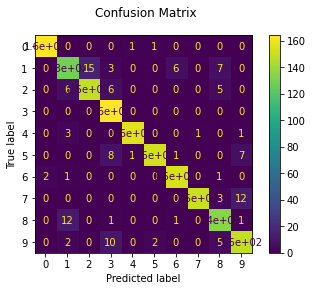

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_pool, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_pool, y_pool)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

# Specify our core estimator along with it's active learning model.
knn = KNeighborsClassifier(n_neighbors=3)
learner = ActiveLearner(estimator=knn,query_strategy=uncertainty_sampling, X_training=X_train, y_training=y_train)

In [ ]:
predictions = learner.predict(x_raw)
is_correct = (predictions == y_raw)



In [ ]:
unqueried_score = learner.score(x_raw, y_raw)
unqueried_score

0.9048414023372288

In [ ]:
performance_history = [unqueried_score]
performance_history

[0.9048414023372288]

#Labeling additional 10% points i.e. 179 points

In [ ]:
#N_QUERIES = 562
N_QUERIES = 179

performance_history1 = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
  query_index, query_instance = learner.query(X_pool)

  # Teach our ActiveLearner model the record it has requested.
  X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
  learner.teach(X=X,y=y)

  # Remove the queried instance from the unlabeled pool.
  X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

  # Calculate and report our model's accuracy.
  model_accuracy = learner.score(x_raw, y_raw)
  print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

  # Save our model's performance for plotting.
  performance_history1.append(model_accuracy)

Accuracy after query 1: 0.9043
Accuracy after query 2: 0.9071
Accuracy after query 3: 0.9082
Accuracy after query 4: 0.9143
Accuracy after query 5: 0.9149
Accuracy after query 6: 0.9182
Accuracy after query 7: 0.9176
Accuracy after query 8: 0.9199
Accuracy after query 9: 0.9199
Accuracy after query 10: 0.9215
Accuracy after query 11: 0.9215
Accuracy after query 12: 0.9243
Accuracy after query 13: 0.9293
Accuracy after query 14: 0.9327
Accuracy after query 15: 0.9349
Accuracy after query 16: 0.9338
Accuracy after query 17: 0.9321
Accuracy after query 18: 0.9338
Accuracy after query 19: 0.9354
Accuracy after query 20: 0.9377
Accuracy after query 21: 0.9388
Accuracy after query 22: 0.9388
Accuracy after query 23: 0.9405
Accuracy after query 24: 0.9405
Accuracy after query 25: 0.9427
Accuracy after query 26: 0.9432
Accuracy after query 27: 0.9421
Accuracy after query 28: 0.9444
Accuracy after query 29: 0.9477
Accuracy after query 30: 0.9494
Accuracy after query 31: 0.9494
Accuracy after qu

After 10% increase of data points- Accuracy *0.9844*

In [ ]:
N_QUERIES = 179

performance_history1 = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
  query_index, query_instance = learner.query(X_pool)

  # Teach our ActiveLearner model the record it has requested.
  X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
  learner.teach(X=X,y=y)

  # Remove the queried instance from the unlabeled pool.
  X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

  # Calculate and report our model's accuracy.
  model_accuracy = learner.score(x_raw, y_raw)
  print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

  # Save our model's performance for plotting.
  performance_history1.append(model_accuracy)


Accuracy after query 1: 0.9839
Accuracy after query 2: 0.9839
Accuracy after query 3: 0.9839
Accuracy after query 4: 0.9839
Accuracy after query 5: 0.9839
Accuracy after query 6: 0.9844
Accuracy after query 7: 0.9850
Accuracy after query 8: 0.9855
Accuracy after query 9: 0.9861
Accuracy after query 10: 0.9861
Accuracy after query 11: 0.9861
Accuracy after query 12: 0.9866
Accuracy after query 13: 0.9866
Accuracy after query 14: 0.9866
Accuracy after query 15: 0.9866
Accuracy after query 16: 0.9866
Accuracy after query 17: 0.9866
Accuracy after query 18: 0.9866
Accuracy after query 19: 0.9866
Accuracy after query 20: 0.9866
Accuracy after query 21: 0.9866
Accuracy after query 22: 0.9866
Accuracy after query 23: 0.9866
Accuracy after query 24: 0.9866
Accuracy after query 25: 0.9866
Accuracy after query 26: 0.9866
Accuracy after query 27: 0.9866
Accuracy after query 28: 0.9866
Accuracy after query 29: 0.9866
Accuracy after query 30: 0.9866
Accuracy after query 31: 0.9866
Accuracy after qu

After 20% increase of data points- Accuracy *0.9911*

In [ ]:
N_QUERIES = 179

performance_history1 = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
  query_index, query_instance = learner.query(X_pool)

  # Teach our ActiveLearner model the record it has requested.
  X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
  learner.teach(X=X,y=y)

  # Remove the queried instance from the unlabeled pool.
  X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

  # Calculate and report our model's accuracy.
  model_accuracy = learner.score(x_raw, y_raw)
  print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

  # Save our model's performance for plotting.
  performance_history1.append(model_accuracy)

Accuracy after query 1: 0.9911
Accuracy after query 2: 0.9911
Accuracy after query 3: 0.9911
Accuracy after query 4: 0.9911
Accuracy after query 5: 0.9911
Accuracy after query 6: 0.9911
Accuracy after query 7: 0.9911
Accuracy after query 8: 0.9911
Accuracy after query 9: 0.9911
Accuracy after query 10: 0.9911
Accuracy after query 11: 0.9911
Accuracy after query 12: 0.9911
Accuracy after query 13: 0.9917
Accuracy after query 14: 0.9917
Accuracy after query 15: 0.9917
Accuracy after query 16: 0.9917
Accuracy after query 17: 0.9917
Accuracy after query 18: 0.9917
Accuracy after query 19: 0.9917
Accuracy after query 20: 0.9917
Accuracy after query 21: 0.9917
Accuracy after query 22: 0.9917
Accuracy after query 23: 0.9917
Accuracy after query 24: 0.9917
Accuracy after query 25: 0.9917
Accuracy after query 26: 0.9917
Accuracy after query 27: 0.9917
Accuracy after query 28: 0.9917
Accuracy after query 29: 0.9917
Accuracy after query 30: 0.9917
Accuracy after query 31: 0.9917
Accuracy after qu

Accuracy after 30% data points-0.9917


In [ ]:
N_QUERIES = 179

performance_history1 = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
  query_index, query_instance = learner.query(X_pool)

  # Teach our ActiveLearner model the record it has requested.
  X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
  learner.teach(X=X,y=y)

  # Remove the queried instance from the unlabeled pool.
  X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

  # Calculate and report our model's accuracy.
  model_accuracy = learner.score(x_raw, y_raw)
  print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

  # Save our model's performance for plotting.
  performance_history1.append(model_accuracy)

Accuracy after query 1: 0.9917
Accuracy after query 2: 0.9917
Accuracy after query 3: 0.9917
Accuracy after query 4: 0.9917
Accuracy after query 5: 0.9917
Accuracy after query 6: 0.9917
Accuracy after query 7: 0.9917
Accuracy after query 8: 0.9917
Accuracy after query 9: 0.9917
Accuracy after query 10: 0.9917
Accuracy after query 11: 0.9917
Accuracy after query 12: 0.9917
Accuracy after query 13: 0.9922
Accuracy after query 14: 0.9922
Accuracy after query 15: 0.9922
Accuracy after query 16: 0.9922
Accuracy after query 17: 0.9922
Accuracy after query 18: 0.9922
Accuracy after query 19: 0.9922
Accuracy after query 20: 0.9922
Accuracy after query 21: 0.9922
Accuracy after query 22: 0.9922
Accuracy after query 23: 0.9922
Accuracy after query 24: 0.9922
Accuracy after query 25: 0.9922
Accuracy after query 26: 0.9922
Accuracy after query 27: 0.9922
Accuracy after query 28: 0.9922
Accuracy after query 29: 0.9922
Accuracy after query 30: 0.9922
Accuracy after query 31: 0.9922
Accuracy after qu

Accuracy after 40% data points-0.9922
